In [2]:
import numpy as np
import tensorflow as tf
import keras 
from keras.layers import Dense, Conv2D, MaxPool2D, UpSampling2D, Dropout, Input, MaxPooling2D, Add
from keras.preprocessing.image import image_utils
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm 
import os
import re
from PIL import Image
from numpy import asarray
from keras.models import Model

In [3]:

# to get the files in proper order
def sorted_alphanumeric(data):  
    convert = lambda text: int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key: [convert(c) for c in re.split('([0-9]+)',key)]
    return sorted(data,key = alphanum_key)


# defining the size of image 
SIZE = 256

image_path = '/Users/wayne0032/Documents/Applied-Data-Mining/Sketch_Feret_Dataset/photos'
img_array = []

sketch_path = '/Users/wayne0032/Documents/Applied-Data-Mining/Sketch_Feret_Dataset/sketches'
sketch_array = []

image_file = sorted_alphanumeric(os.listdir(image_path))
sketch_file = sorted_alphanumeric(os.listdir(sketch_path))


for i in tqdm(image_file):
    image = cv2.imread(image_path + '/' + i,1)
    
    # as opencv load image in bgr format converting it to rgb
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # resizing images 
    image = cv2.resize(image, (SIZE, SIZE))
    
    # normalizing image 
    image = image.astype('float32') / 255.0
    
    #appending normal normal image    
    img_array.append(asarray(image))
    # Image Augmentation
    
    # horizontal flip 
    img1 = cv2.flip(image,1)
    img_array.append(asarray(img1))

     #vertical flip 
    img2 = cv2.flip(image,-1)
    img_array.append(asarray(img2))
     #vertical flip 
    img3 = cv2.flip(image,-1)
    # horizontal flip
    img3 = cv2.flip(img3,1)
    img_array.append(asarray(img3))
    # rotate clockwise 
    img4 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    img_array.append(asarray(img4))
    # flip rotated image 
    img5 = cv2.flip(img4,1)
    img_array.append(asarray(img5))
     # rotate anti clockwise 
    img6 = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    img_array.append(asarray(img6))
    # flip rotated image 
    img7 = cv2.flip(img6,1)
    img_array.append(asarray(img7))
  
    
for i in tqdm(sketch_file):
    image = cv2.imread(sketch_path + '/' + i,1)
    
    # as opencv load image in bgr format converting it to rgb
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # resizing images 
    image = cv2.resize(image, (SIZE, SIZE))
    
    # normalizing image 
    image = image.astype('float32') / 255.0
    # appending normal sketch image
    sketch_array.append(asarray(image))
    
    #Image Augmentation
    # horizontal flip 
    img1 = cv2.flip(image,1)
    sketch_array.append(asarray(img1))
     #vertical flip 
    img2 = cv2.flip(image,-1)
    sketch_array.append(asarray(img2))
     #vertical flip 
    img3 = cv2.flip(image,-1)
    # horizontal flip
    img3 = cv2.flip(img3,1)
    sketch_array.append(asarray(img3))
    # rotate clockwise 
    img4 = cv2.rotate(image, cv2.ROTATE_90_CLOCKWISE)
    sketch_array.append(asarray(img4))
    # flip rotated image 
    img5 = cv2.flip(img4,1)
    sketch_array.append(asarray(img5))
     # rotate anti clockwise 
    img6 = cv2.rotate(image, cv2.ROTATE_90_COUNTERCLOCKWISE)
    sketch_array.append(asarray(img6))
    # flip rotated image 
    img7 = cv2.flip(img6,1)
    sketch_array.append(asarray(img7))

100%|██████████| 846/846 [00:03<00:00, 263.52it/s]


In [4]:
print("Total number of sketch images:",len(sketch_array))
print("Total number of images:",len(img_array))

Total number of sketch images: 6768
Total number of images: 6768


In [5]:
# defining function to plot images pair
def plot_images(image, sketches):
    plt.figure(figsize=(7,7))
    plt.subplot(1,2,1)
    plt.title('Image', color = 'green', fontsize = 20)
    plt.imshow(image)
    plt.subplot(1,2,2)
    plt.title('Sketches ', color = 'black', fontsize = 20)
    plt.imshow(sketches)
   
    plt.show()

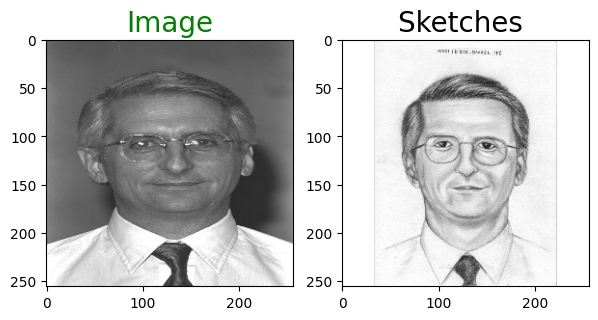

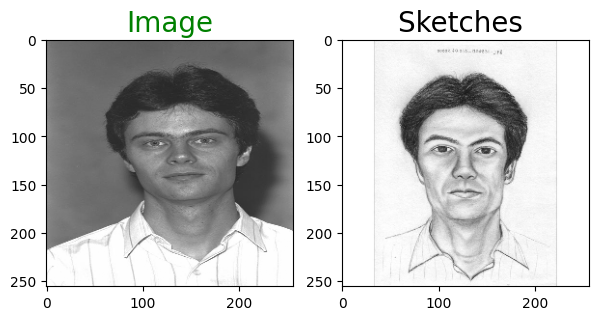

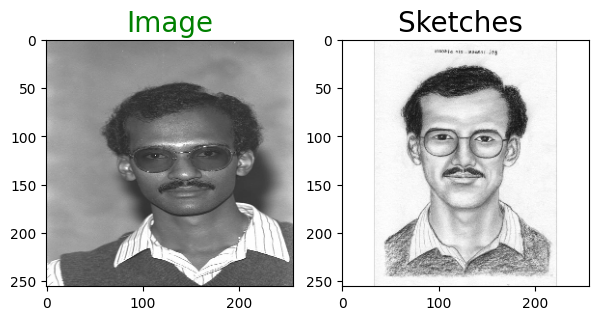

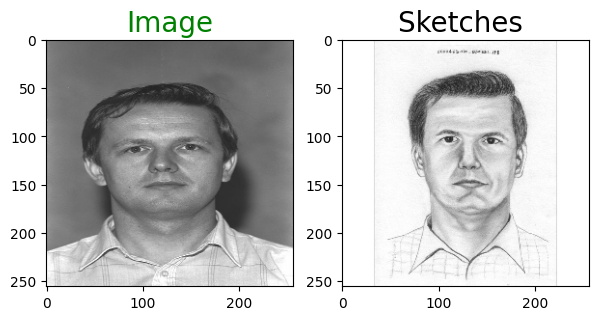

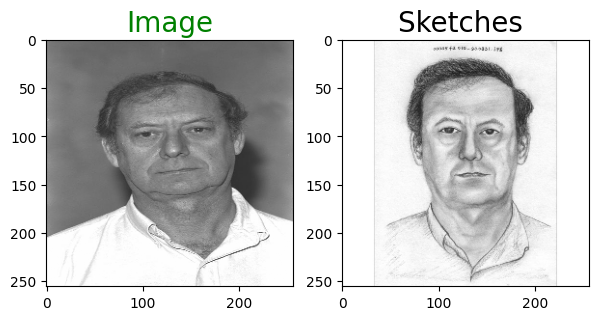

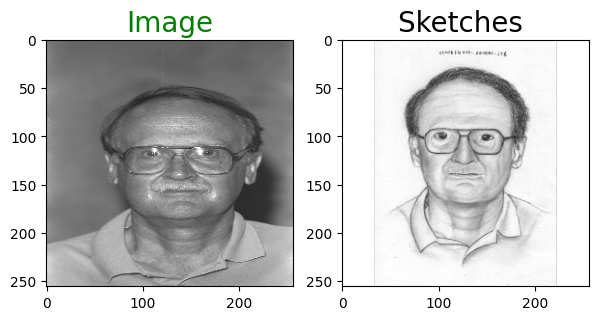

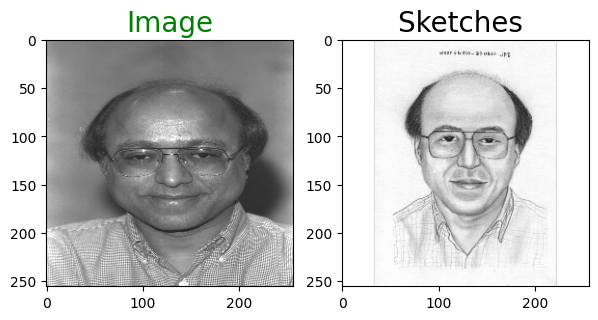

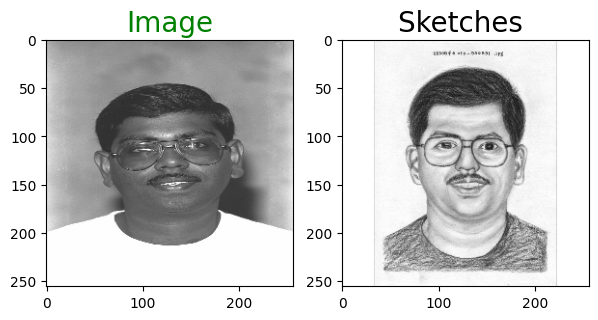

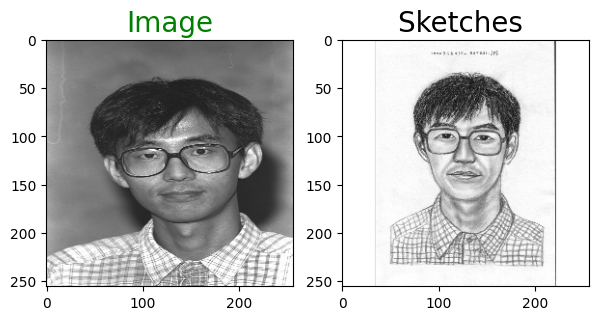

In [6]:
ls = [i for i in range(0,65,8)]
for i in ls:
    plot_images(img_array[i],sketch_array[i])

In [7]:
train_sketch_image = sketch_array[:1400]
train_image = img_array[:1400]
test_sketch_image = sketch_array[1400:]
test_image = img_array[1400:]
# reshaping
train_sketch_image = np.reshape(train_sketch_image,(len(train_sketch_image),SIZE,SIZE,3))
train_image = np.reshape(train_image, (len(train_image),SIZE,SIZE,3))
print('Train color image shape:',train_image.shape)
test_sketch_image = np.reshape(test_sketch_image,(len(test_sketch_image),SIZE,SIZE,3))
test_image = np.reshape(test_image, (len(test_image),SIZE,SIZE,3))
print('Test color image shape',test_image.shape)

Train color image shape: (1400, 256, 256, 3)
Test color image shape (5368, 256, 256, 3)


In [8]:
def SRCNN():
    input_img = Input(shape=(SIZE, SIZE,3))
    
    enc1 = Conv2D(64,kernel_size=3,activation="relu",padding="same")(input_img)
    enc1 = Conv2D(64,kernel_size=3,activation="relu",padding="same")(enc1)
    down1 = MaxPooling2D(pool_size=2)(enc1)

    enc2 = Conv2D(128,kernel_size=3,activation="relu",padding="same")(down1)
    enc2 = Conv2D(128,kernel_size=3,activation="relu",padding="same")(enc2)
    down2 = MaxPooling2D(pool_size=2)(enc2)
    
    enc3 = Conv2D(256,kernel_size=3,activation="relu",padding="same")(down2)
    
    up3 = UpSampling2D(size=2)(enc3)
    dec3 = Conv2D(128,kernel_size=3,activation="relu",padding="same")(up3)
    dec3 = Conv2D(128,kernel_size=3,activation="relu",padding="same")(dec3)
    
    add2 = Add()([dec3,enc2])
    up2 = UpSampling2D(size=2)(add2)
    dec2 = Conv2D(64,kernel_size=3,activation="relu",padding="same")(up2)
    dec2 = Conv2D(64,kernel_size=3,activation="relu",padding="same")(dec2)
    
    add1 = Add()([dec2,enc1])
    dec1 = Conv2D(3,kernel_size=5,activation="linear",padding="same")(add1)
    
    model = Model(input_img,dec1)
    return model


In [9]:
SRCNN_MODEL = SRCNN()
SRCNN_MODEL.summary()

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2023-03-10 00:05:08.045773: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-03-10 00:05:08.046742: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 256, 256, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 256, 256, 64  1792        ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 conv2d_1 (Conv2D)              (None, 256, 256, 64  36928       ['conv2d[0][0]']                 
                                )                                                             

In [10]:
SRCNN_MODEL.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = 'mean_absolute_error',
              metrics = ['acc'])

#history = vae.fit(x=train_image, y=train_sketch_image, epochs=250, batch_size=16, validation_data=(test_image,test_sketch_image))
history = SRCNN_MODEL.fit(train_image, train_sketch_image, epochs = 30, validation_data=(test_image,test_sketch_image))

Epoch 1/30


2023-03-10 00:05:26.430645: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-03-10 00:05:27.049366: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


44/44 [==============================] - 122s 3s/step - loss: 0.3079 - acc: 0.3211
Epoch 2/30
44/44 [==============================] - 119s 3s/step - loss: 0.1645 - acc: 0.3287
Epoch 3/30
44/44 [==============================] - 118s 3s/step - loss: 0.1545 - acc: 0.3304
Epoch 4/30
44/44 [==============================] - 118s 3s/step - loss: 0.1472 - acc: 0.3475
Epoch 5/30
44/44 [==============================] - 118s 3s/step - loss: 0.1421 - acc: 0.2851
Epoch 6/30
44/44 [==============================] - 116s 3s/step - loss: 0.1415 - acc: 0.3798
Epoch 7/30
44/44 [==============================] - 118s 3s/step - loss: 0.1359 - acc: 0.3627
Epoch 8/30
44/44 [==============================] - 118s 3s/step - loss: 0.1377 - acc: 0.4204
Epoch 9/30
44/44 [==============================] - 119s 3s/step - loss: 0.1347 - acc: 0.2756
Epoch 10/30
44/44 [==============================] - 118s 3s/step - loss: 0.1340 - acc: 0.2909
Epoch 11/30
44/44 [==============================] - 120s 3s/step - lo

KeyError: 'val_loss'

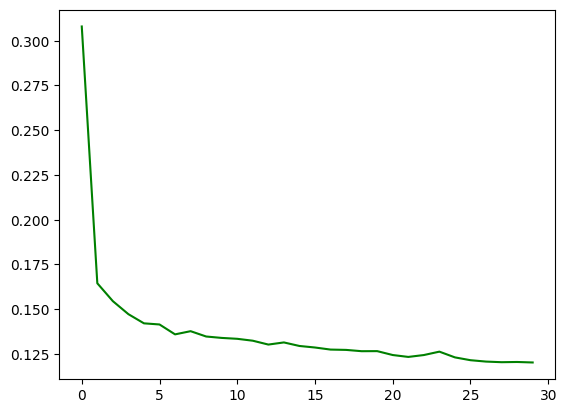

In [11]:
plt.plot(history.history['loss'], color='green')
plt.plot(history.history['val_loss'], color='red')
plt.legend(['Training loss', 'Validation loss'])
plt.xlabel('Number of echos')
plt.ylabel('Loss')

In [12]:
def show_images(real,sketch, predicted):
    plt.figure(figsize = (12,12))
    plt.subplot(1,3,1)
    plt.title("Sketch",fontsize = 15, color = 'Lime')
    plt.imshow(sketch)
    plt.subplot(1,3,2)
    plt.title("Image",fontsize = 15, color = 'Blue')
    plt.imshow(real)
    plt.subplot(1,3,3)
    plt.title("Predicted",fontsize = 15, color = 'gold')
    plt.imshow(predicted)

2023-03-10 01:10:29.899746: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


168/168 [==============================] - 160s 944ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

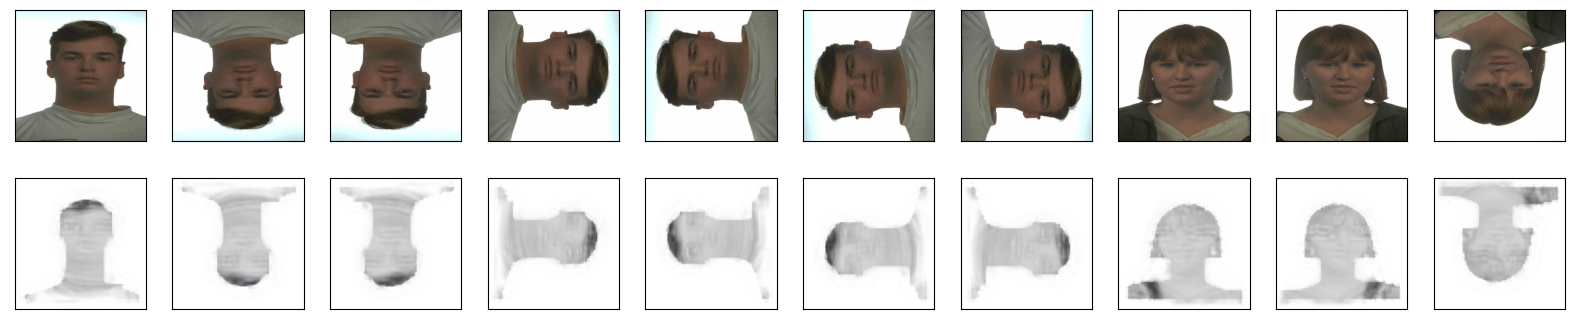

In [13]:
decoded_imgs = SRCNN_MODEL.predict(test_image)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(test_image[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i])
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()